In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("C:/Users/Nantha/Documents/Glassdoor-Job-Salary-Prediction/EDA.csv")

In [6]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Same State,Age,R,Python,AWS,Excel,Job Simplified,Seniority,Desc Length,No of Competitors
0,Data Scientist / Machine Learning Expert,96-101,Posting Title\r\nData Scientist / Machine Lear...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,...,0,24,0,1,0,0,data scientist,na,5126,0
1,Data Scientist,96-101,Overview\r\n\r\n\r\nData Scientist\r\n\r\nLoca...,4.0,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,1,39,0,1,1,1,data scientist,na,9845,0
2,Data Scientist,96-101,Search by Keyword\r\nMore Options\r\n\r\nSearc...,4.1,ABIOMED,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981,Company - Public,...,1,39,0,1,1,1,data scientist,na,10692,2
3,Data Scientist,96-101,New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974,Company - Private,...,1,46,0,1,0,1,data scientist,na,2187,3
4,Data Scientist,96-101,STR is a government research contractor specia...,4.7,Systems & Technology Research,"Woburn, MA","Woburn, MA",201 to 500 employees,2010,Company - Private,...,1,10,0,1,0,1,data scientist,na,3736,0


In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Job State', 'Same State',
       'Age', 'R', 'Python', 'AWS', 'Excel', 'Job Simplified', 'Seniority',
       'Desc Length', 'No of Competitors'],
      dtype='object')

In [10]:
df_model = df[['Avg Salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','No of Competitors','Job State', 'Same State',
       'Age', 'R', 'Python', 'AWS', 'Excel', 'Job Simplified', 'Seniority',
       'Desc Length']]

In [11]:
df_model.head()

,Avg Salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,No of Competitors,Job State,Same State,Age,R,Python,AWS,Excel,Job Simplified,Seniority,Desc Length
0,98.5,3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),0,MA,0,24,0,1,0,0,data scientist,na,5126
1,98.5,4.0,1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,₹10 to ₹50 billion (INR),0,MA,1,39,0,1,1,1,data scientist,na,9845
2,98.5,4.1,1001 to 5000 employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹10 to ₹50 billion (INR),2,MA,1,39,0,1,1,1,data scientist,na,10692
3,98.5,4.7,201 to 500 employees,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,3,MA,1,46,0,1,0,1,data scientist,na,2187
4,98.5,4.7,201 to 500 employees,Company - Private,Aerospace & Defence,Aerospace & Defence,₹10 to ₹50 billion (INR),0,MA,1,10,0,1,0,1,data scientist,na,3736


# Converting categorical into dummies

In [12]:
df_dum = pd.get_dummies(df_model)

In [13]:
df_dum.head()

,Avg Salary,Rating,No of Competitors,Same State,Age,R,Python,AWS,Excel,Desc Length,...,Job State_ CA,Job State_ CT,Job State_ MA,Job State_ NJ,Job State_ NY,Job State_ WA,Job Simplified_data scientist,Seniority_junior,Seniority_na,Seniority_senior
0,98.5,3.9,0,0,24,0,1,0,0,5126,...,0,0,1,0,0,0,1,0,1,0
1,98.5,4.0,0,1,39,0,1,1,1,9845,...,0,0,1,0,0,0,1,0,1,0
2,98.5,4.1,2,1,39,0,1,1,1,10692,...,0,0,1,0,0,0,1,0,1,0
3,98.5,4.7,3,1,46,0,1,0,1,2187,...,0,0,1,0,0,0,1,0,1,0
4,98.5,4.7,0,1,10,0,1,0,1,3736,...,0,0,1,0,0,0,1,0,1,0


# Splitting into Independent(X) and Dependent(y) variables

In [15]:
X = df_dum.drop('Avg Salary',axis=1)
y = df_dum['Avg Salary']

# Splitting into Training and Testing data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OLS Linear Model

In [21]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)

C:\Users\Nantha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Avg Salary   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     3.711
Date:                Fri, 29 May 2020   Prob (F-statistic):           1.23e-27
Time:                        20:11:13   Log-Likelihood:                -4883.5
No. Observations:                1000   AIC:                             9989.
Df Residuals:                     889   BIC:                         1.053e+04
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Rating                                              -0.5961      1.080     -0.552      0.581      -2.715       1.523
No of Competitors                                   -1.0554      1.272     -0.830      0.407      -3.551       1.440
Same State                                           2.0838      2.802      0.744      0.457      -3.416       7.583
Age                                                 -0.0040      0.042     -0.095      0.925      -0.086       0.078
R                                                  -22.5552     34.772     -0.649      0.517     -90.799      45.689
Python                                               4.0921      3.129      1.308      0.191      -2.048      10.233
AWS                                                 -2.7450      2.903     -0.946      0.345      -8.443       2.953
Excel                                                2.9325      2.474      1.185      0.236      -1.924       7.789
Desc Length                                         -0.0009      0.001     -1.032      0.302      -0.003       0.001
Size_-1                                             11.4780      2.855      4.020      0.000       5.874      17.082
Size_1 to 50 employees                               1.8841      3.987      0.473      0.637      -5.941       9.709
Size_10000+ employees                               12.4824      6.024      2.072      0.039       0.660      24.305
Size_1001 to 5000 employees                         13.4517      3.851      3.493      0.001       5.893      21.010
Size_201 to 500 employees                            1.6810      4.476      0.376      0.707      -7.104      10.466
Size_5001 to 10000 employees                         3.1771      6.586      0.482      0.630      -9.748      16.103
Size_501 to 1000 employees                          11.7329      5.353      2.192      0.029       1.228      22.238
Size_51 to 200 employees                             0.8907      4.126      0.216      0.829      -7.207       8.989
Size_Unknown                                        10.5546      6.839      1.543      0.123      -2.867      23.976
Type of ownership_-1                                11.4780      2.855      4.020      0.000       5.874      17.082
Type of ownership_College / University             -37.4797     21.076     -1.778      0.076     -78.844       3.884
Type of ownership_Company - Private                  8.4707      7.033      1.204      0.229      -5.332      22.274
Type of ownership_Company - Public                  14.9686      7.253      2.064      0.039       0.733      29.204
Type of ownership_Contract                          10.9485     32.734      0.334      0.738     -53.296      75.193
Type of ownership_Government             

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression,Lasso
lm = LinearRegression()

In [44]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error',cv=3))

[-2.67852914e+01 -1.27844693e+08 -2.70715107e+01]


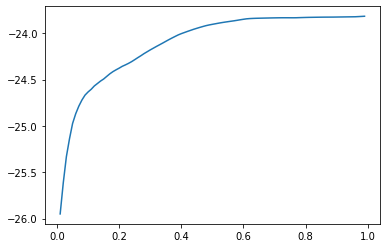

In [33]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [34]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-23.816126


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [37]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

C:\Users\Nantha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nantha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nantha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-26.41839108539138

In [39]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [40]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'mae'),
  

In [41]:
gs.best_score_

-24.31117838541667

In [42]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=240,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [46]:
lml.fit(X_train, y_train)

Lasso(alpha=0.99, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
y_pred_lm = lm.predict(X_test)
y_pred_lml = lml.predict(X_test)
y_pred_rf = gs.best_estimator_.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error

In [50]:
print(mean_absolute_error(y_test,y_pred_lm))
print(mean_absolute_error(y_test,y_pred_lml))
print(mean_absolute_error(y_test,y_pred_rf))

25.758051125955394
24.230362183695515
24.2370625


In [51]:
print(mean_absolute_error(y_test,(y_pred_rf+y_pred_lm)/2))

24.463252553183448
